<a href="https://colab.research.google.com/github/ZhenZhangz/E4511/blob/main/DTC_clean1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

TensorFlow 1.x selected.
--2021-04-08 05:57:35--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   129MB/s    in 4.0s    

2021-04-08 05:57:39 (128 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - a

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


InvalidVersionSpec: Invalid version '4.19.112+': empty version component


real	0m11.738s
user	0m8.010s
sys	0m1.794s
--2021-04-08 06:06:40--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]   1.07

In [ ]:
! pip install MolVS
! pip install bravado
! pip install UMAP

     |████████████████████████████████| 71kB 12.1MB/s 
  Created wheel for MolVS: filename=MolVS-0.1.1-cp37-none-any.whl size=32376 sha256=a51e4fda49eccd8014c9581e7327f57cb2062c275de75586631b207da7ced7a6
  Stored in directory: /root/.cache/pip/wheels/30/37/a8/8ac8147605c9de6b45ffd66d1cc19761d41467db12b34a0de8
Successfully built MolVS
     |████████████████████████████████| 71kB 12.3MB/s 
     |████████████████████████████████| 133kB 16.8MB/s 
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none-any.whl size=18120 sha256=3dfd20afa68485b4d3e06d097c49bf4ee18ef18049a834430d3266a8d7ee954a
  Stored in directory: /root/.cache/pip/wheels/bb/af/c9/b6e9fb5f9b2470e4ed2a7241c9ab3a8cdd3bc8555ae02ca2e6
Successfully built strict-rfc3339
  Created wheel for UMAP: filename=umap-0.1.1-cp37-none-any.whl size=3568 sha256=6de2a28eba97032b09fcf204acd4de091bb34f43f1d2577970cccf4ca5abc022
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94c

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import json
import os
import requests

# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
orig_df = pd.read_csv('/content/drive/MyDrive/Columbia_E4511/SLC6A4_DTC_SMILES.csv', header = 0)
orig_df

,Unnamed: 0,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,standard_type,standard_relation,standard_value,standard_units,activity_comment,ep_action_mode,assay_format,assaytype,assay_subtype,inhibitor_type,detection_tech,assay_cell_line,compound_concentration_value,compound_concentration_value_unit,substrate_type,substrate_relation,substrate_value,substrate_units,assay_description,title,journal,doc_type,annotation_comments,pDTC_Value,SMILES,base_rdkit_smiles
0,21,CHEMBL2205816,ABONQAUMSMWLEK-UHFFFAOYSA-N,NaN,NaN,P31645,SEROTONIN TRANSPORTER,SLC6A4,NaN,NaN,22959245.0,INHIBITION,<,50.00,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Binding affinity to SERT at 10 uM,A s(1) receptor pharmacophore derived from a s...,Bioorg. Med. Chem. Lett.,PUBLICATION,NaN,50.00,C1C2C3C4C1C5C2C6C3C4C5(N6CCC7=CC=CC=N7)O,OC12C3C4CC5C6C4C1C6C(C53)N2CCc1ccccn1
1,22,CHEMBL2205816,ABONQAUMSMWLEK-UHFFFAOYSA-N,NaN,NaN,P31645,SEROTONIN TRANSPORTER,SLC6A4,NaN,NaN,23981939.0,INHIBITION,<,50.00,%,NaN,NaN,cell_based,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Displacement of [3H]-citalopram from human SER...,"N-substituted 8-aminopentacyclo[5.4.0.0(2,6).0...",Bioorg. Med. Chem.,PUBLICATION,NaN,50.00,C1C2C3C4C1C5C2C6C3C4C5(N6CCC7=CC=CC=N7)O,OC12C3C4CC5C6C4C1C6C(C53)N2CCc1ccccn1
2,50,CHEMBL2030634,ADGIWWYGVBZYMC-UHFFFAOYSA-N,N-(CYCLOHEXYLMETHYL)PYRROLIDINE,NaN,P31645,SEROTONIN TRANSPORTER,SLC6A4,NaN,NaN,22607684.0,INHIBITION,<,50.00,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inhibition of SERT at 10 uM,7-Azabicyclo[2.2.1]heptane as a scaffold for t...,Bioorg. Med. Chem. Lett.,PUBLICATION,NaN,50.00,C1CCC(CC1)CN2CCCC2,C1CCC(CN2CCCC2)CC1
3,54,CHEMBL1702607,ADVPTQAUNPRNPO-UHFFFAOYSA-N,NaN,NaN,P31645,SEROTONIN TRANSPORTER,SLC6A4,NaN,NaN,12649361.0,KI,=,10000.00,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,C(C(C(=O)O)N)S(=O)O,NC(CS(=O)O)C(=O)O
4,89,CHEMBL2207386,AGKMPGSBLMAGAX-UHFFFAOYSA-N,NaN,NaN,P31645,SEROTONIN TRANSPORTER,SLC6A4,NaN,NaN,23141912.0,INHIBITION,=,4.62,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inhibition of SERT at 1 uM by radioligand disp...,"Design, synthesis and pharmacological evaluati...",Bioorg. Med. Chem. Lett.,PUBLICATION,NaN,4.62,CN1CCN(CC1)CC2=C3C=CN(C3=CC=C2)S(=O)(=O)C4=CC=...,CN1CCN(Cc2cccc3c2ccn3S(=O)(=O)c2ccccc2Br)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,9019,CHEMBL3741992,NaN,NaN,NaN,P31645,SEROTONIN TRANSPORTER,SLC6A4,NaN,NaN,26460788.0,Inhibition,<,30.00,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inhibition of human 5-HT transporter at 10 uM,Novel Series of Dihydropyridinone P2X7 Recepto...,J. Med. Chem.,PUBLICATION,NaN,30.00,CC1=CC(=C(C=C1NC(=O)C2=CNC(=O)C[C@H]2C3=CC=C(C...,Cc1cc(Cl)c(OCCO)cc1NC(=O)C1=CNC(=O)C[C@H]1c1cc...
462,9026,CHEMBL3763166,NaN,NaN,NaN,P31645,SEROTONIN TRANSPORTER,SLC6A4,NaN,NaN,26653033.0,Inhibition,<,50.00,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inhibition of Serotonin transporter (unknown o...,Phenyl Benzenesulfonylhydrazides Exhibit Selec...,J. Med. Chem.,PUBLICATION,NaN,50.00,C1C2=C(C=CC(=C2)S(=O)(=O)NNC3=CC=C(C=C3)Br)NC1=O,O=C1Cc2cc(S(=O)(=O)NNc3ccc(Br)cc3)ccc2N1
463,9068,CHEMBL3775436,NaN,NaN,NaN,P31645,SEROTONIN TRANSPORTER,SLC6A4,NaN,NaN,26988801.0,Inhibition,=,96.50,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Displacement of [3H]imipramine from human reco...,"Design, physico-chemical properties and biolog...",Bioorg. Med. Chem.,PUBLICATION,NaN,96.50,CC1=C(C(=CC=C1)C)OCCOCCN[C@H](C)CO.Cl,Cc1cccc(C)c1OCCOCCN[C@H](C)CO
464,9075,CHEMBL3775769,NaN,NaN,NaN,P31645,SEROTONIN TRANSPORTER,SLC6A4,NaN,NaN,26988801.0,Inhibition,=,91.40,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Displacement of [3H]imipramine from human reco...,"Design, physico-chemical properties and biolo

In [ ]:
orig_df.columns

Index(['Unnamed: 0', 'compound_id', 'standard_inchi_key', 'compound_name',
       'synonym', 'target_id', 'target_pref_name', 'gene_names',
       'wildtype_or_mutant', 'mutation_info', 'pubmed_id', 'standard_type',
       'standard_relation', 'standard_value', 'standard_units',
       'activity_comment', 'ep_action_mode', 'assay_format', 'assaytype',
       'assay_subtype', 'inhibitor_type', 'detection_tech', 'assay_cell_line',
       'compound_concentration_value', 'compound_concentration_value_unit',
       'substrate_type', 'substrate_relation', 'substrate_value',
       'substrate_units', 'assay_description', 'title', 'journal', 'doc_type',
       'annotation_comments', 'pDTC_Value', 'SMILES', 'base_rdkit_smiles'],
      dtype='object')

In [ ]:
df = orig_df[['compound_id','standard_inchi_key','standard_type','standard_relation',
       'standard_value', 'standard_units','pDTC_Value', 'SMILES', 'base_rdkit_smiles']]
df

,compound_id,standard_inchi_key,standard_type,standard_relation,standard_value,standard_units,pDTC_Value,SMILES,base_rdkit_smiles
0,CHEMBL2205816,ABONQAUMSMWLEK-UHFFFAOYSA-N,INHIBITION,<,50.00,%,50.00,C1C2C3C4C1C5C2C6C3C4C5(N6CCC7=CC=CC=N7)O,OC12C3C4CC5C6C4C1C6C(C53)N2CCc1ccccn1
1,CHEMBL2205816,ABONQAUMSMWLEK-UHFFFAOYSA-N,INHIBITION,<,50.00,%,50.00,C1C2C3C4C1C5C2C6C3C4C5(N6CCC7=CC=CC=N7)O,OC12C3C4CC5C6C4C1C6C(C53)N2CCc1ccccn1
2,CHEMBL2030634,ADGIWWYGVBZYMC-UHFFFAOYSA-N,INHIBITION,<,50.00,%,50.00,C1CCC(CC1)CN2CCCC2,C1CCC(CN2CCCC2)CC1
3,CHEMBL1702607,ADVPTQAUNPRNPO-UHFFFAOYSA-N,KI,=,10000.00,NM,5.00,C(C(C(=O)O)N)S(=O)O,NC(CS(=O)O)C(=O)O
4,CHEMBL2207386,AGKMPGSBLMAGAX-UHFFFAOYSA-N,INHIBITION,=,4.62,%,4.62,CN1CCN(CC1)CC2=C3C=CN(C3=CC=C2)S(=O)(=O)C4=CC=...,CN1CCN(Cc2cccc3c2ccn3S(=O)(=O)c2ccccc2Br)CC1
...,...,...,...,...,...,...,...,...,...
461,CHEMBL3741992,NaN,Inhibition,<,30.00,%,30.00,CC1=CC(=C(C=C1NC(=O)C2=CNC(=O)C[C@H]2C3=CC=C(C...,Cc1cc(Cl)c(OCCO)cc1NC(=O)C1=CNC(=O)C[C@H]1c1cc...
462,CHEMBL3763166,NaN,Inhibition,<,50.00,%,50.00,C1C2=C(C=CC(=C2)S(=O)(=O)NNC3=CC=C(C=C3)Br)NC1=O,O=C1Cc2cc(S(=O)(=O)NNc3ccc(Br)cc3)ccc2N1
463,CHEMBL3775436,NaN,Inhibition,=,96.50,%,96.50,CC1=C(C(=CC=C1)C)OCCOCCN[C@H](C)CO.Cl,Cc1cccc(C)c1OCCOCCN[C@H](C)CO
464,CHEMBL3775769,NaN,Inhibition,=,91.40,%,91.40,CC1=C(C(=CC=C1)C)OCCOCCN[C@@H](C)CO.Cl,Cc1cccc(C)c1OCCOCCN[C@@H](C)CO


In [ ]:
df.standard_type.value_counts()

KI              196
INHIBITION      119
IC50            102
ACTIVITY         18
Ki               11
Inhibition        7
EC50              4
EFFICACY          3
KI(APP)           2
KD                1
RFU               1
IC5               1
DISPLACEMENT      1
Name: standard_type, dtype: int64

In [ ]:
print(sum(df['pDTC_Value'].isna()) )
print(len(df) - sum(df['pDTC_Value'].isna()))

len(orig_df)


53
413


466

In [ ]:
# filter out to have df of standard type IC/EC50, non empty standard value, non empoty inchi key,
# non-empty compound id, standard units = 'NM'

In [ ]:
orig_df.gene_names.value_counts()

SLC6A4    466
Name: gene_names, dtype: int64

In [ ]:
dset_df = df[~(df.standard_inchi_key.isna())  &
            (df.standard_units == 'NM') &
            ~df.standard_value.isna() &
            ~df.compound_id.isna() &
             (df.standard_relation == '=') &
             ~df.standard_relation.isna()]

In [ ]:
dset_df = dset_df.loc[(df.standard_type == 'IC50') | (df.standard_type == 'EC50')]
dset_df

,compound_id,standard_inchi_key,standard_type,standard_relation,standard_value,standard_units,pDTC_Value,SMILES,base_rdkit_smiles
20,CHEMBL11,BCGWQEUPMDMJNV-UHFFFAOYSA-N,IC50,=,8.000,NM,8.096910,CN(C)CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,CN(C)CCCN1c2ccccc2CCc2ccccc21
21,CHEMBL11,BCGWQEUPMDMJNV-UHFFFAOYSA-N,IC50,=,6.900,NM,8.161151,CN(C)CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,CN(C)CCCN1c2ccccc2CCc2ccccc21
24,CHEMBL11,BCGWQEUPMDMJNV-UHFFFAOYSA-N,IC50,=,7.300,NM,8.136677,CN(C)CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,CN(C)CCCN1c2ccccc2CCc2ccccc21
26,CHEMBL11,BCGWQEUPMDMJNV-UHFFFAOYSA-N,IC50,=,29.000,NM,7.537602,CN(C)CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,CN(C)CCCN1c2ccccc2CCc2ccccc21
27,CHEMBL11,BCGWQEUPMDMJNV-UHFFFAOYSA-N,IC50,=,1.100,NM,8.958607,CN(C)CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,CN(C)CCCN1c2ccccc2CCc2ccccc21
...,...,...,...,...,...,...,...,...,...
406,CHEMBL549,WSEQXVZVJXJVFP-UHFFFAOYSA-N,IC50,=,90000.000,NM,4.045757,CN(C)CCCC1(C2=C(CO1)C=C(C=C2)C#N)C3=CC=C(C=C3)F,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21
407,CHEMBL549,WSEQXVZVJXJVFP-UHFFFAOYSA-N,IC50,=,0.902,NM,9.044793,CN(C)CCCC1(C2=C(CO1)C=C(C=C2)C#N)C3=CC=C(C=C3)F,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21
412,CHEMBL19215,WZHJKEUHNJHDLS-QTGUNEKASA-N,IC50,=,590.000,NM,6.229148,CN1C[C@@H](C[C@H]2[C@H]1CC3=CN(C4=CC=CC2=C34)C...,CN1C[C@H](CNC(=O)OCc2ccccc2)C[C@@H]2c3cccc4c3c...
445,CHEMBL444985,ZINGRQZUIVEPKX-UHFFFAOYSA-N,IC50,=,3.000,NM,8.522879,C1CNCCC1COC2=CC3=C(C=CC(=C3)C#N)C=C2,N#Cc1ccc2ccc(OCC3CCNCC3)cc2c1


In [ ]:
for col in dset_df.columns:
    print(dset_df[col].value_counts())

CHEMBL41         34
CHEMBL11         10
CHEMBL43048       7
CHEMBL72          3
CHEMBL549         3
CHEMBL559456      3
CHEMBL2047571     1
CHEMBL54          1
CHEMBL715         1
CHEMBL3334797     1
CHEMBL56564       1
CHEMBL2047570     1
CHEMBL42          1
CHEMBL19215       1
CHEMBL2047574     1
CHEMBL2047573     1
CHEMBL444985      1
CHEMBL2298806     1
CHEMBL2204360     1
CHEMBL471035      1
CHEMBL6437        1
CHEMBL726         1
CHEMBL2047561     1
CHEMBL30713       1
CHEMBL479         1
CHEMBL184770      1
CHEMBL2391541     1
CHEMBL453996      1
CHEMBL180101      1
Name: compound_id, dtype: int64
RTHCYVBBDHJXIQ-UHFFFAOYSA-N    34
BCGWQEUPMDMJNV-UHFFFAOYSA-N    10
SHXWCVYOXRDMCX-UHFFFAOYSA-N     7
NTBRVAZZXJHBGJ-UHFFFAOYSA-N     3
WSEQXVZVJXJVFP-UHFFFAOYSA-N     3
HCYAFALTSJYZDH-UHFFFAOYSA-N     3
PLDUPXSUYLZYBN-UHFFFAOYSA-N     1
JOJYHYRCIYAVHN-UHFFFAOYSA-N     1
WZHJKEUHNJHDLS-QTGUNEKASA-N     1
JYIMWQCCVNSNJW-UHFFFAOYSA-N     1
QXCOEFGWAUGVTR-UHFFFAOYSA-N     1
ZINGRQZUIVEPKX

In [ ]:
dset_df.dtypes

compound_id            object
standard_inchi_key     object
standard_type          object
standard_relation      object
standard_value        float64
standard_units         object
pDTC_Value            float64
SMILES                 object
base_rdkit_smiles      object
dtype: object

In [ ]:
sum(dset_df.base_rdkit_smiles.isna())

0

In [ ]:
dset_df = dset_df.rename(columns={"pDTC_Value": "pXC50"})
dset_df.columns

Index(['compound_id', 'standard_inchi_key', 'standard_type',
       'standard_relation', 'standard_value', 'standard_units', 'pXC50',
       'SMILES', 'base_rdkit_smiles'],
      dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dset_df.to_csv('drive/MyDrive/DTC_DROP.csv')

Canonicalizing 29 molecules...
Done
Computing fingerprints...
Done
Computing MCS distance matrix...
Done
        compound_1     compound_2      dist   i   j
1         CHEMBL11       CHEMBL72  0.024390   0   2
299   CHEMBL453996   CHEMBL444985  0.052632  13  27
114   CHEMBL471035   CHEMBL453996  0.076923   4  13
128   CHEMBL471035   CHEMBL444985  0.121951   4  27
182  CHEMBL2047571  CHEMBL2047574  0.163636   7  15
262      CHEMBL715       CHEMBL42  0.200000  11  21
141   CHEMBL184770  CHEMBL2298806  0.230769   5  17
76        CHEMBL72     CHEMBL6437  0.250000   2  24
23        CHEMBL11     CHEMBL6437  0.268293   0  24
96   CHEMBL2391541    CHEMBL30713  0.272727   3  19


AttributeError: ignored

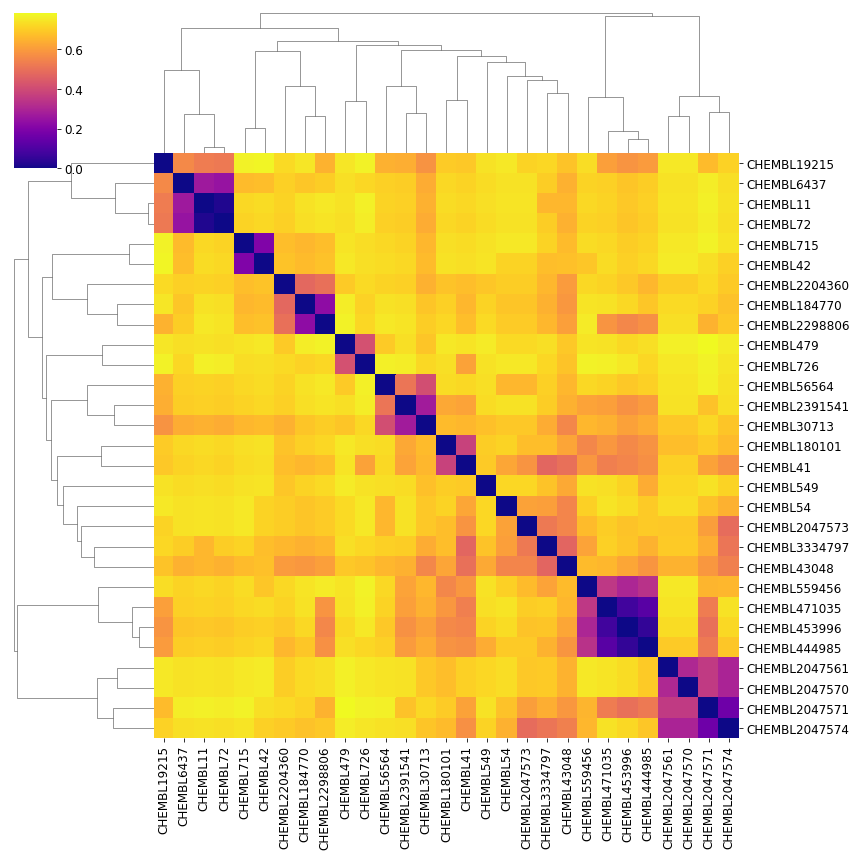

In [ ]:

dp.diversity_plots(dset_key = 'drive/MyDrive/DTC_DROP.csv',
                   datastore = False,
                   response_col = 'pXC50', smiles_col='base_rdkit_smiles',
                   max_for_mcs = 100)

In [ ]:
feat_type = 'ECFP'
dist_metric = 'tanimoto'
smiles_lst1 = dset_df['base_rdkit_smiles'].tolist()
calc_type = 'nearest'
dist_sample = cd.calc_dist_smiles(feat_type, dist_metric, smiles_lst1, None, calc_type)

print(len(dist_sample))
print(len(smiles_lst1))

83
83


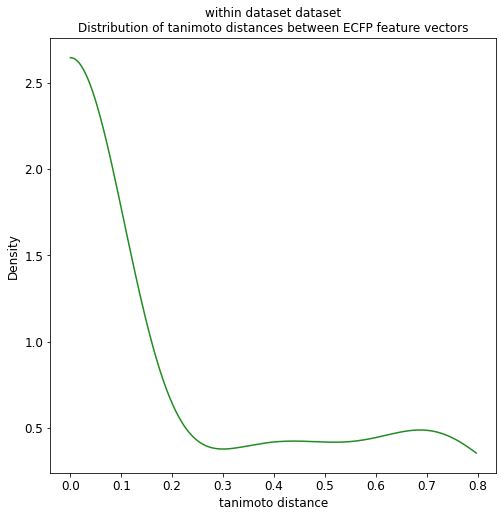

In [ ]:
from scipy.stats.kde import gaussian_kde

# import math library
import numpy as np

# for creating plots
import matplotlib.pyplot as plt

# current directory
odir='./'

# name for the task
task_name='within dataset'

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')

In [ ]:
dset_df

,compound_id,standard_inchi_key,standard_type,standard_relation,standard_value,standard_units,pXC50,SMILES,base_rdkit_smiles
20,CHEMBL11,BCGWQEUPMDMJNV-UHFFFAOYSA-N,IC50,=,8.000,NM,8.096910,CN(C)CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,CN(C)CCCN1c2ccccc2CCc2ccccc21
21,CHEMBL11,BCGWQEUPMDMJNV-UHFFFAOYSA-N,IC50,=,6.900,NM,8.161151,CN(C)CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,CN(C)CCCN1c2ccccc2CCc2ccccc21
24,CHEMBL11,BCGWQEUPMDMJNV-UHFFFAOYSA-N,IC50,=,7.300,NM,8.136677,CN(C)CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,CN(C)CCCN1c2ccccc2CCc2ccccc21
26,CHEMBL11,BCGWQEUPMDMJNV-UHFFFAOYSA-N,IC50,=,29.000,NM,7.537602,CN(C)CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,CN(C)CCCN1c2ccccc2CCc2ccccc21
27,CHEMBL11,BCGWQEUPMDMJNV-UHFFFAOYSA-N,IC50,=,1.100,NM,8.958607,CN(C)CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,CN(C)CCCN1c2ccccc2CCc2ccccc21
...,...,...,...,...,...,...,...,...,...
406,CHEMBL549,WSEQXVZVJXJVFP-UHFFFAOYSA-N,IC50,=,90000.000,NM,4.045757,CN(C)CCCC1(C2=C(CO1)C=C(C=C2)C#N)C3=CC=C(C=C3)F,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21
407,CHEMBL549,WSEQXVZVJXJVFP-UHFFFAOYSA-N,IC50,=,0.902,NM,9.044793,CN(C)CCCC1(C2=C(CO1)C=C(C=C2)C#N)C3=CC=C(C=C3)F,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21
412,CHEMBL19215,WZHJKEUHNJHDLS-QTGUNEKASA-N,IC50,=,590.000,NM,6.229148,CN1C[C@@H](C[C@H]2[C@H]1CC3=CN(C4=CC=CC2=C34)C...,CN1C[C@H](CNC(=O)OCc2ccccc2)C[C@@H]2c3cccc4c3c...
445,CHEMBL444985,ZINGRQZUIVEPKX-UHFFFAOYSA-N,IC50,=,3.000,NM,8.522879,C1CNCCC1COC2=CC3=C(C=CC(=C3)C#N)C=C2,N#Cc1ccc2ccc(OCC3CCNCC3)cc2c1


In [ ]:

import os

# From our dataframe, we are working with the PIC50 column 
data=dset_df

column = 'pXC50'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'standard_inchi_key'

# smiles_col: SMILES column
smiles_col = 'base_rdkit_smiles'

# Here we are creating a new dataframe, called check_df
check_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (73, 13)
List of 'bad' duplicates removed
             standard_inchi_key     pXC50  ...   Perc_Var  VALUE_NUM_std
69  SHXWCVYOXRDMCX-UHFFFAOYSA-N  4.490000  ...  17.423833       1.138135
70  SHXWCVYOXRDMCX-UHFFFAOYSA-N  3.310000  ...  39.125364       1.138135
71  SHXWCVYOXRDMCX-UHFFFAOYSA-N  6.371611  ...  17.181119       1.138135
72  SHXWCVYOXRDMCX-UHFFFAOYSA-N  6.371611  ...  17.181119       1.138135
73  SHXWCVYOXRDMCX-UHFFFAOYSA-N  5.958607  ...   9.585514       1.138135
74  SHXWCVYOXRDMCX-UHFFFAOYSA-N  5.560000  ...   2.254672       1.138135
75  SHXWCVYOXRDMCX-UHFFFAOYSA-N  6.000000  ...  10.346772       1.138135
77  WSEQXVZVJXJVFP-UHFFFAOYSA-N  7.721246  ...  11.301003       2.590089
78  WSEQXVZVJXJVFP-UHFFFAOYSA-N  4.045757  ...  41.680806       2.590089
79  WSEQXVZVJXJVFP-UHFFFAOYSA-N  9.044793  ...  30.379803       2.590089

[10 rows x 5 columns]

Dataset de-duplicated
Dataframe size (27, 13)
New column created with averaged v

In [ ]:

old_compound_id='base_rdkit_smiles'
new_compound_id='base_rdkit_smiles'

# Takes all the compounds that aren't part of the curated data frame and prints them
reject=data[~data[old_compound_id].isin(check_df[new_compound_id])]
reject

,compound_id,standard_inchi_key,standard_type,standard_relation,standard_value,standard_units,pXC50,SMILES,base_rdkit_smiles
340,CHEMBL43048,SHXWCVYOXRDMCX-UHFFFAOYSA-N,EC50,=,32359.370,NM,4.490000,CC(CC1=CC2=C(C=C1)OCO2)NC,CNC(C)Cc1ccc2c(c1)OCO2
341,CHEMBL43048,SHXWCVYOXRDMCX-UHFFFAOYSA-N,EC50,=,489778.820,NM,3.310000,CC(CC1=CC2=C(C=C1)OCO2)NC,CNC(C)Cc1ccc2c(c1)OCO2
342,CHEMBL43048,SHXWCVYOXRDMCX-UHFFFAOYSA-N,IC50,=,425.000,NM,6.371611,CC(CC1=CC2=C(C=C1)OCO2)NC,CNC(C)Cc1ccc2c(c1)OCO2
343,CHEMBL43048,SHXWCVYOXRDMCX-UHFFFAOYSA-N,IC50,=,425.000,NM,6.371611,CC(CC1=CC2=C(C=C1)OCO2)NC,CNC(C)Cc1ccc2c(c1)OCO2
344,CHEMBL43048,SHXWCVYOXRDMCX-UHFFFAOYSA-N,IC50,=,1100.000,NM,5.958607,CC(CC1=CC2=C(C=C1)OCO2)NC,CNC(C)Cc1ccc2c(c1)OCO2
345,CHEMBL43048,SHXWCVYOXRDMCX-UHFFFAOYSA-N,IC50,=,2754.230,NM,5.560000,CC(CC1=CC2=C(C=C1)OCO2)NC,CNC(C)Cc1ccc2c(c1)OCO2
347,CHEMBL43048,SHXWCVYOXRDMCX-UHFFFAOYSA-N,EC50,=,1000.000,NM,6.000000,CC(CC1=CC2=C(C=C1)OCO2)NC,CNC(C)Cc1ccc2c(c1)OCO2
403,CHEMBL549,WSEQXVZVJXJVFP-UHFFFAOYSA-N,IC50,=,19.000,NM,7.721246,CN(C)CCCC1(C2=C(CO1)C=C(C=C2)C#N)C3=CC=C(C=C3)F,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21
406,CHEMBL549,WSEQXVZVJXJVFP-UHFFFAOYSA-N,IC50,=,90000.000,NM,4.045757,CN(C)CCCC1(C2=C(CO1)C=C(C=C2)C#N)C3=CC=C(C=C3)F,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21
407,CHEMBL549,WSEQXVZVJXJVFP-UHFFFAOYSA-N,IC50,=,0.902,NM,9.044793,CN(C)CCCC1(C2=C(CO1)C=C(C=C2)C#N)C3=CC=C(C=C3)F,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21


In [ ]:
column='pXC50'; #'standard_value'
list_bad_duplicates='Yes'

# Actually compiles all the data with the specifies column and tells what columns to include 
# (inchi_key, smiles, and relation)
temp_df=curate_data.aggregate_assay_data(data, 
                                         value_col=column, 
                                         output_value_col=None,
                                         label_actives=True,
                                         active_thresh=6,
                                         id_col='standard_inchi_key', 
                                         smiles_col='base_rdkit_smiles', 
                                         relation_col='standard_relation')

#Removes all duplicates from the data frame and puts it in the final, curated dataframe
curated_df = temp_df[~temp_df.isin([np.inf]).any(1)]

0 entries in input table are missing SMILES strings
29 unique SMILES strings are reduced to 29 unique base SMILES strings


In [ ]:
curated_df.to_csv('drive/MyDrive/DTC_Curated.csv')

In [ ]:

# Prints number of unique resjected compound names/rows
print("Number of discarded compounds",reject[compound_id].nunique())

Number of discarded compounds 2


(0.0, 12.0)

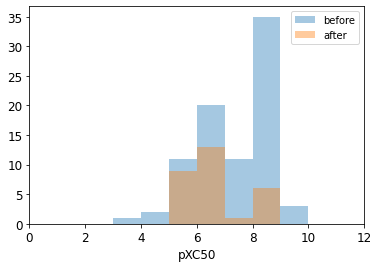

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()


before=dset_df["pXC50"]

# Our after variable is comprised of our curated_df dataframe 
# Our curated_df was configured earlier to discard any out of range values
after=curated_df["pXC50"]

# plots the values of the response value column of both the before and after dataframes from above
# sns.distplot is a Seaborn distplot, which allows you to show a histogram with a line on it
# A distplot plots a univariate distribution of observations 
# Below, we are separating our data set into a before section and an after section 
# To break down the sns.distplot functions: 
# bins=range(0, 12, 1) is used to bin our range of values, meaning to divide the entire range of values into a series of intervals
# ax=ax 
# kde is a kernel density estimate plot that represents the data using a continuous probability density curve
# kde=False will remove the density line on the histogram
# The label= function is used to label different sections of our plot 
sns.distplot(before, bins=range(0, 12, 1), ax=ax, kde=False, label='before')
sns.distplot(after, bins=range(0, 12, 1), ax=ax, kde=False, label='after')

#configures plot by adding a legend and setting the x axis limits for readability
# plt.legend() adds the legend to the plot
plt.legend()

# ax.set_xlim is setting the x-axis limits of the graph, setting it to be from (0,12)
ax.set_xlim([0, 12])